In [2]:
import numpy as np
import cv2
import random
import os

In [22]:
# luminosity and noise removal function
def luminosity_image(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert to LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    # Apply CLAHE to L channel
    clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8, 8))
    l_eq = clahe.apply(l)

    # Merge back LAB channels
    lab_eq = cv2.merge((l_eq, a, b))
    enhanced_image = cv2.cvtColor(lab_eq, cv2.COLOR_LAB2BGR)

    # Image noise removal using Gaussian filter
    filtered_image = cv2.GaussianBlur(enhanced_image, (5, 5), 0)

    return filtered_image

In [25]:
im_lum = luminosity_image("../../02_Data/sample_images/sample_messidor_1.tif")
cv2.imwrite("../../02_Data/sample_images/sample_messidor_1_lum.tif", im_lum)

True

In [32]:
"""
To crop the image based on the inputs:
    - img: image to be cropped
    - desired_size: desired size of final image
    - threshold: threshold value to be used for each pixel
"""

import numpy as np
from PIL import Image


def crop_image(img, threshold=15, resize_flag=False, desired_size=(512, 512)):
    # Convert image to numpy array
    img_np = img

    # Get the shape of the image
    x_dim = img_np.shape[0]
    y_dim = img_np.shape[1]

    # Sum along the color axis (assuming the color axis is the third dimension)
    pixel_sums = img_np.sum(axis=2)

    # Sum along the x and y axes
    x_arr = pixel_sums.sum(axis=1)
    y_arr = pixel_sums.sum(axis=0)

    # Find the first and last indices where the sum exceeds the threshold
    x_start = np.where(x_arr > threshold * y_dim)[0][0]
    x_end = np.where(x_arr > threshold * y_dim)[0][-1]

    y_start = np.where(y_arr > threshold * x_dim)[0][0]
    y_end = np.where(y_arr > threshold * x_dim)[0][-1]

    # Crop the image
    new_img = img_np[x_start:x_end, y_start:y_end]

    # converting back to image
    new_img = Image.fromarray(new_img)

    # resizing the image
    if resize_flag:
        new_img = new_img.resize(desired_size)

    return new_img

In [33]:
im = cv2.imread("../../02_Data/sample_images/sample_messidor_1.tif")
im_crop = crop_image(im)

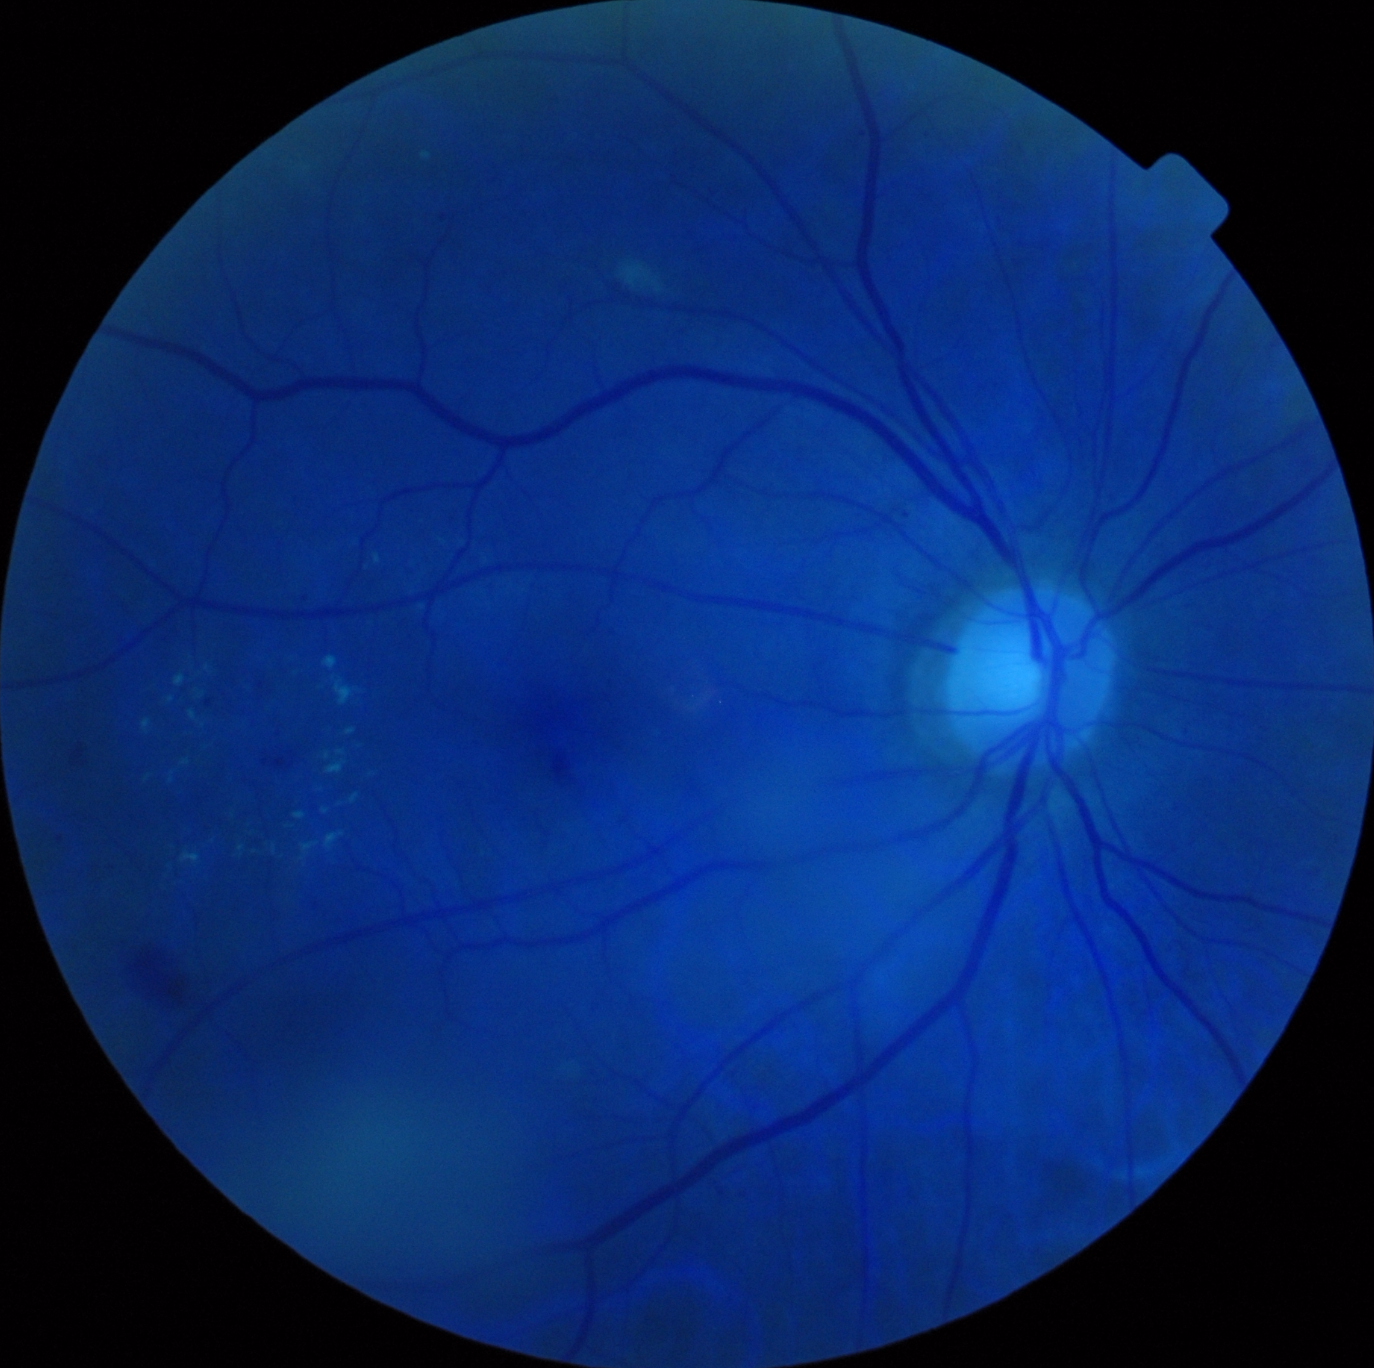

In [35]:
im_crop

In [36]:
def crop_image_tina(img, threshold=15, resize_flag=False, desired_size=(224, 224)):
    img_np = np.array(img)
    x_dim = img_np.shape[0]
    y_dim = img_np.shape[1]
    pixel_sums = img_np.sum(axis=2)
    x_arr = pixel_sums.sum(axis=1)
    y_arr = pixel_sums.sum(axis=0)
    x_start = np.where(x_arr > threshold * y_dim)[0][0]
    x_end = np.where(x_arr > threshold * y_dim)[0][-1]
    y_start = np.where(y_arr > threshold * x_dim)[0][0]
    y_end = np.where(y_arr > threshold * x_dim)[0][-1]
    new_img = img_np[x_start:x_end, y_start:y_end]
    new_img = Image.fromarray(new_img)
    if resize_flag:
        new_img = new_img.resize(desired_size)
    return new_img

In [40]:
ex = Image.open('"../../02_Data/sample_images/sample_messidor_1.tif"')
ex

FileNotFoundError: [Errno 2] No such file or directory: '/workspaces/Diabetic-Retinopathy/01_Codes/Dani Codes/02_Data/sample_images/sample_messidor_1.tif"'

In [37]:
crop_tina = crop_image_tina("../../02_Data/sample_images/sample_messidor_1.tif")

IndexError: tuple index out of range

In [ ]:
def normalize_image(img):
    # Convert image to numpy array
    img_np = np.array(img)

    # Calculate mean and standard deviation (std) channel-wise
    mean_channels = np.mean(img_np, axis=(0, 1))
    std_channels = np.std(img_np, axis=(0, 1))

    # Normalize each channel separately
    normalized_image = np.zeros_like(img_np, dtype=np.float32)
    for channel in range(img_np.shape[2]):
        normalized_image[:, :, channel] = (
            img_np[:, :, channel] - mean_channels[channel]
        ) / std_channels[channel]

    # Scale values to be within [0, 255]
    normalized_image = (
        (normalized_image - np.min(normalized_image))
        / (np.max(normalized_image) - np.min(normalized_image))
        * 255
    )

    # Clip and return the normalized image
    normalized_image = np.clip(normalized_image, 0, 255)
    return normalized_image.astype(np.uint8)